In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [33]:
X,y=make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

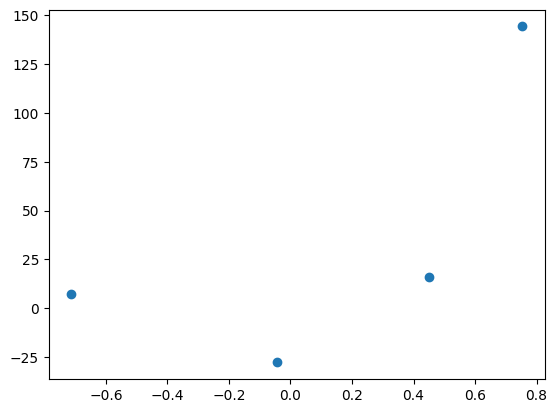

In [34]:
plt.scatter(X,y)

In [35]:
#apply linear regression on this data
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [36]:
lr.fit(X,y)

LinearRegression()

In [37]:
y_pred1=lr.predict(X)

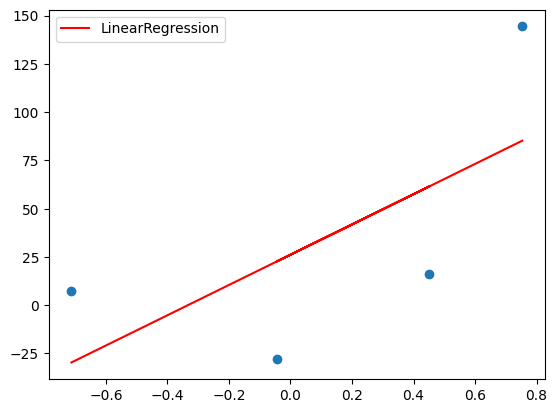

In [38]:
plt.scatter(X,y)
plt.plot(X,y_pred1,'r',label='LinearRegression')
plt.legend()
plt.show()

In [39]:
print(f'The intercept is {lr.intercept_}')
print(f'The slope is {lr.coef_[0]}')

The intercept is 26.15963284313262
The slope is 78.35063667947497


In [40]:
#assume slope is 78.35 and b=0
m=78.35
b=0
y_pred2=((m*X)+b).reshape(4)

In [41]:
X

array([[-0.71239066],
       [ 0.45181234],
       [-0.04450308],
       [ 0.75376638]])

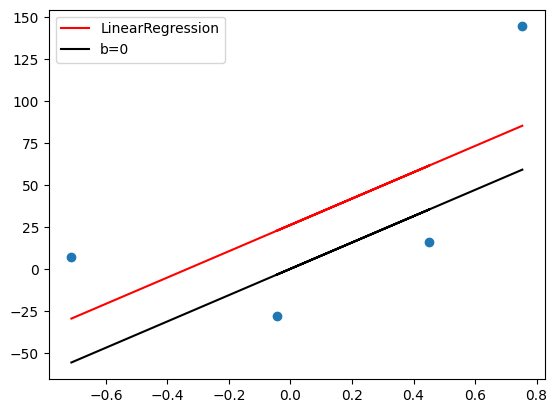

In [42]:
plt.scatter(X,y)
plt.plot(X,y_pred1,'r',label='LinearRegression')
plt.plot(X,y_pred2,'black',label='b=0')
plt.legend()
plt.show()

In [43]:
#calculate slope of b=0
steep=-2*np.sum(y-m*X.ravel()-b)
steep

-209.27763408209216

In [44]:
#multiply with learning rate
lr=0.1
step=lr*steep
step

-20.927763408209216

In [45]:
#b_new=b_old-slope
b=b-step
b

20.927763408209216

In [46]:
y_pred3=((m*X)+b).reshape(4)
y_pred3

array([-34.88804496,  56.32726015,  17.44094722,  79.98535918])

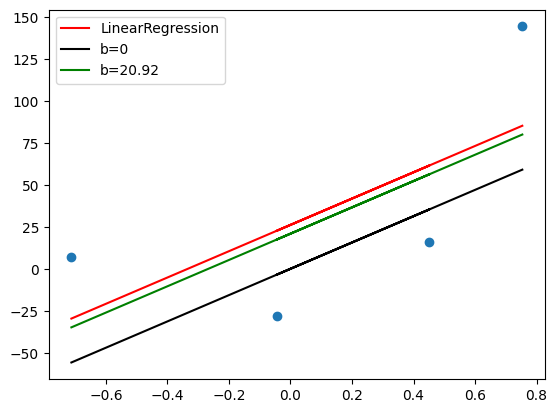

In [47]:
plt.scatter(X,y)
plt.plot(X,y_pred1,'r',label='LinearRegression')
plt.plot(X,y_pred2,'black',label='b=0')
plt.plot(X,y_pred3,'g',label='b=20.92')
plt.legend()
plt.show()

In [48]:
#calculate slope at b=20.92
steep=-2*np.sum(y-m*X.ravel()-b)
steep

-41.85552681641843

In [49]:
#multiply slope with 0.1
step=lr*steep
step

-4.185552681641844

In [50]:
b=b-step
b

25.11331608985106

In [51]:
y_pred4=((m*X)+b).reshape(4)

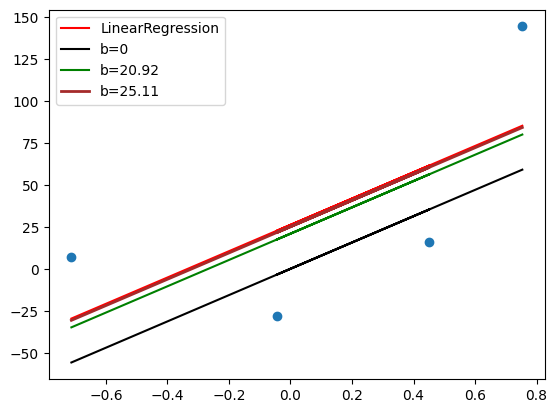

In [52]:
plt.scatter(X,y)
plt.plot(X,y_pred1,'r',label='LinearRegression')
plt.plot(X,y_pred2,'black',label='b=0')
plt.plot(X,y_pred3,'g',label='b=20.92')
plt.plot(X,y_pred4,'brown',label='b=25.11',linewidth=2)
plt.legend()
plt.show()

In [53]:
#calculate slope at b=25.11
steep=-2*np.sum(y-m*X.ravel()-b)
steep

-8.371105363283675

In [54]:
#multiply with learning rate
step=lr*steep
step

-0.8371105363283675

In [55]:
b=b-step
b

25.95042662617943

In [56]:
y_pred_6=((m*X)+b).reshape(4)

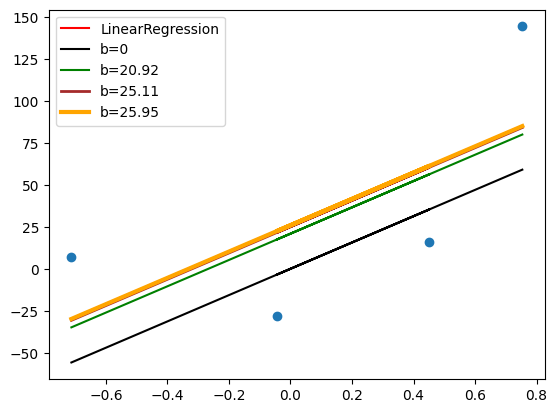

In [57]:
plt.scatter(X,y)
plt.plot(X,y_pred1,'r',label='LinearRegression')
plt.plot(X,y_pred2,'black',label='b=0')
plt.plot(X,y_pred3,'g',label='b=20.92')
plt.plot(X,y_pred4,'brown',label='b=25.11',linewidth=2)
plt.plot(X,y_pred_6,'orange',label='b=25.95',linewidth=3)
plt.legend()
plt.show()

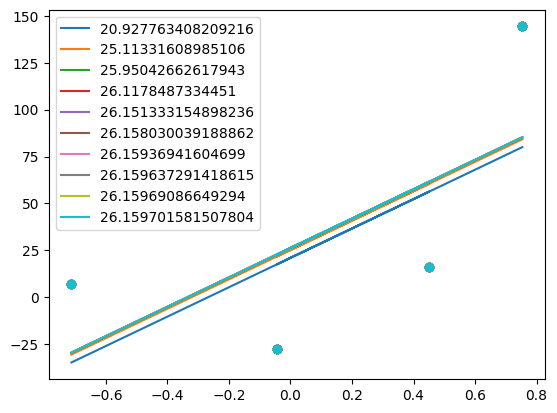

In [58]:
#loop to calculate gardient descent
m=78.35
b=0
epoch=10
for i in range(10):
    steep=-2*np.sum(y-m*X.ravel()-b)
    step=lr*steep
    b=b-step
    y_pred=((m*X)+b).reshape(4)
    plt.plot(X,y_pred,label=b)
    plt.legend()
    plt.scatter(X,y)

Gradient Descent with m and b

In [59]:
X1,y1=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

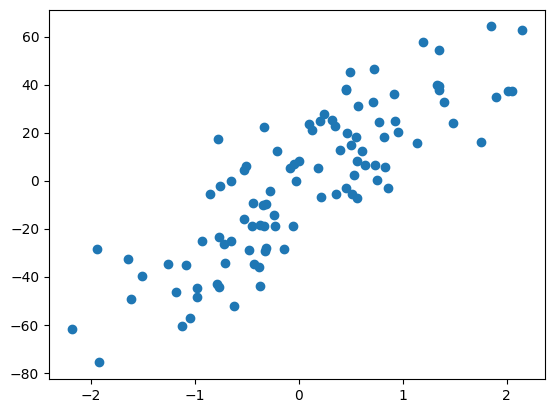

In [60]:
plt.scatter(X1,y1)

In [62]:
lr1=LinearRegression()

In [63]:
lr1.fit(X1,y1)

LinearRegression()

In [67]:
y_pred7=lr1.predict(X1)

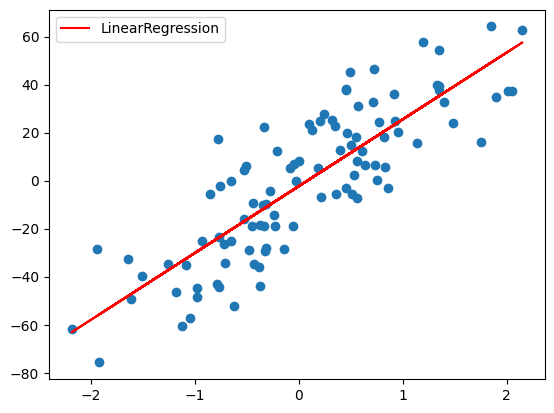

In [70]:
plt.scatter(X1,y1)
plt.plot(X1,y_pred7,label='LinearRegression',color='r')
plt.legend()
plt.show()


In [74]:
print(lr1.intercept_)
print(lr1.coef_[0])

-2.29474455867698
27.82809103252014


In [159]:
class GD:
    
    def __init__(self,lr,epochs):
        self.m=0
        self.b=0
        self.lr=lr
        self.epochs=epochs
        
    def fit(self,X,y):
        for i in range(self.epochs):
            #calculate slope for intercept
            loss_slope_b=-2*np.sum(y-self.m*X.ravel()-self.b)
            #calculate slope for m
            loss_slope_m=-2*np.sum((y-self.m*X.ravel()-b)*X.ravel())
            self.b=self.b-(self.lr*loss_slope_b)
            self.m=self.m-(self.lr*loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m*X+self.b
        

In [160]:
gd=GD(0.001,50)

In [161]:
gd.fit(X1,y1)

25.920094043375187 -2.1827295081120264


In [167]:
y_pred=gd.predict(X1)

In [168]:
y_pred

array([[-20.64796246],
       [-13.51358601],
       [-13.9440339 ],
       [ 22.51472954],
       [  3.98256803],
       [ 20.1399503 ],
       [ -8.48976884],
       [  2.61108692],
       [-20.87110885],
       [-13.3257023 ],
       [ 50.0519838 ],
       [  8.11380303],
       [  3.20346742],
       [ -8.20722997],
       [-22.10561417],
       [  9.56318436],
       [ 14.40312326],
       [  7.1363814 ],
       [-44.04647981],
       [ 43.1577822 ],
       [-22.63339923],
       [-15.4529129 ],
       [-26.24526586],
       [ 53.55539924],
       [ -7.55725319],
       [-44.66818487],
       [-10.9597465 ],
       [-10.53220499],
       [-14.65992188],
       [-15.74319516],
       [ 16.53067268],
       [ 17.66975692],
       [  9.5715417 ],
       [-34.88367426],
       [-58.87296307],
       [-32.90889652],
       [  3.45363795],
       [ 32.29921026],
       [-30.36257858],
       [ 12.39114679],
       [-41.39581717],
       [ -2.24465328],
       [ -9.39200233],
       [  9